# Outlier Removal Example

From: https://github.com/ksatola

## Description
Use a **Simple Linear Regression** to predict net worths based on age and check how outliers removal improves scoring.

## Origin
This is Python 3 version of a mini-project from [Udacity's Intro to Machine Learning](https://classroom.udacity.com/courses/ud120) free course.

## Steps to Prepare
none

## Additional Information
none

In [1]:
import sys
from time import time
import random
import numpy
import matplotlib.pyplot as plt
import pickle

In [2]:
### Load up some practice data with outliers in it
ages = pickle.load(open("practice_outliers_ages.pkl", "rb"))
net_worths = pickle.load(open("practice_outliers_net_worths.pkl", "rb"))

In [3]:
### Ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape(numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape(numpy.array(net_worths), (len(net_worths), 1))

from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# Measure time
t0 = time()

# Fit the model
reg = LinearRegression()
reg.fit(ages_train, net_worths_train) #net_worths_train is a target feature

print("Coefficient: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

print("Training time: {} seconds.".format(round(time()-t0, 3)))

Coefficient: [[5.07793064]]
Intercept: [25.21002155]
Training time: 0.01 seconds.


In [6]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (different between the prediction
        and the actual net worth)
        return a list of tuples named cleaned_data where
        each tuple is of the form (age, net_worth, error)
    """

    cleaned_data = []

    ### your code goes here
    error = list((net_worths - predictions)**2)

    cleaned_data = zip(ages, net_worths, error)
    cleaned_data = sorted(cleaned_data, key = lambda tup: tup[2])
    cleaned_data = cleaned_data[:80]

    
    return cleaned_data

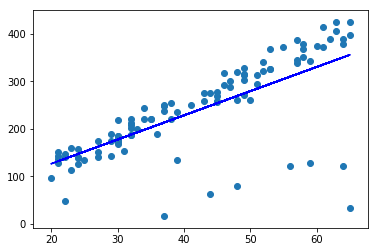

In [7]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.savefig('12_OutliersRemovalRegression1.png')
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner(predictions, ages_train, net_worths_train)
except NameError:
    print("Your regression object doesn't exist, or isn't name reg.")
    print("Can't make predictions to use in identifying outliers.")

In [8]:
# Calculate regression performance metrics
# r-squared score - the closer to 1 the better
r2_test = reg.score(ages_test, net_worths_test) # low if overfitted
r2_train = reg.score(ages_train, net_worths_train) # this is just to compare, as we should trust the score on the test data

print("R Squared for test: {}".format(r2_test))
print("R Squared for train: {}".format(r2_train))

R Squared for test: 0.8782624703664671
R Squared for train: 0.4898725961751499


In [9]:
print("Coefficient: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

Coefficient: [[5.07793064]]
Intercept: [25.21002155]


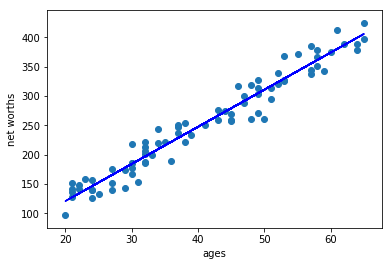

In [10]:
### Only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### Refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("You don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.savefig('12_OutliersRemovalRegression2.png')
    plt.show()
else:
    print("outlierCleaner() is returning an empty list, no refitting to be done.")

In [11]:
# Calculate regression performance metrics
# r-squared score - the closer to 1 the better
r2_test = reg.score(ages_test, net_worths_test) # low if overfitted
r2_train = reg.score(ages_train, net_worths_train) # this is just to compare, as we should trust the score on the test data

print("R Squared for test: {}".format(r2_test))
print("R Squared for train: {}".format(r2_train))

R Squared for test: 0.9824700510044744
R Squared for train: 0.41356442151468853


In [12]:
print("Coefficient: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

Coefficient: [[6.32006691]]
Intercept: [-5.32173018]
